# Kaggle link
https://www.kaggle.com/nyansoe/assignment-2
<br>
# Overview of the Algorithm
The algorithm: <br>
(1) First, cities are divided into four portions based on the first/originated city (y) coordinate.  So there will be a lower left, lower right, upper left, and upper right parts. <br>
(2) Then, the cities are sorted out based on "wieght" between them and the first/originated city.  X,Y and angle from the originated city are included in calculation.  This is very raw sort.  Three dimensional Euclidean distance calculation is used.  Then four parts are combined.  After that, minimum spanning tree algorighm is used to find the best possible routes that cover all the cities. <br> 
(3) Both max and min heap priority queue are used for sorting, and both adjacency list and matrix for Graph are used in the algorithm along with Kruskal's minimum spanning tree algorithm.  

## Importing Library

In [ ]:
import matplotlib.pyplot as plt
import math
import sys
import itertools


# set miximum recursion limit
sys.setrecursionlimit(21000)

# Testing Graph Class with Kruskal Algorithm

Before implementing Kruskal's MST Algorithm, I needed to test it.  In here, I wrote mst_Kruskal and is_cycle methods from
scratch.  First, I had also tried to implement Prim-Jarnik's Algorithm, but I found it a bit complex for me.  So, I changed to Kruskal's Algorithm.  The following grpah is one of the graphs that I tested with this code.
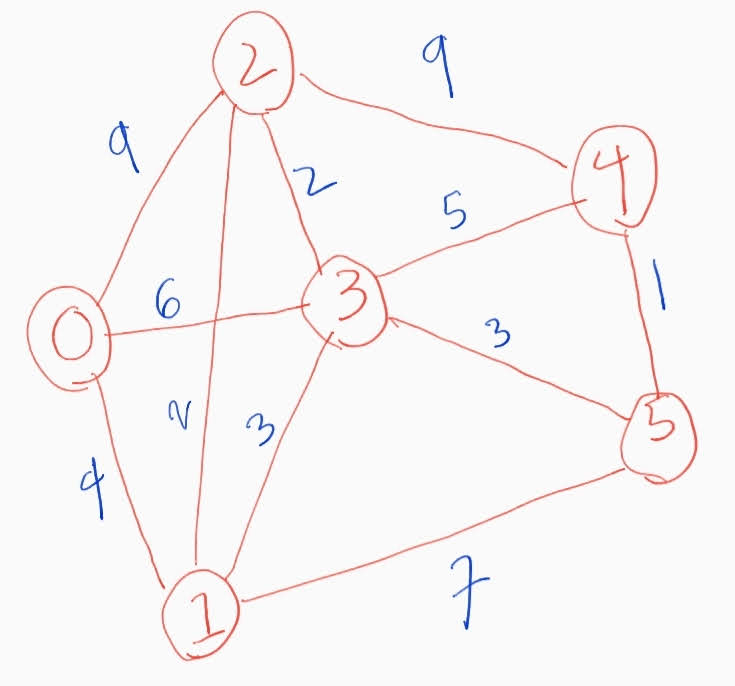

In [ ]:
INFINITY = math.inf

class Graph_Test(object):
    """Test Grpah and Kruskal"""
    def __init__(self, matrix):
        self.adjMatrix = matrix
        
    def remove_edge(self, v1, v2):
        if self.adjMatrix[v1][v2] == 0:
            print("No edge between %d and %d" % (v1, v2))
            return
        self.adjMatrix[v1][v2] = INFINITY
        self.adjMatrix[v2][v1] = INFINITY
        
    def get_edge(self, v1, v2):
        return self.adjMatrix[v1][v2]
    
    def contains_edge(self, v1, v2):
        return True if self.adjMatrix[v1][v2] > 0 else False
    
    def __len__(self):
        return self.size
        
    def toString(self):
        for row in self.adjMatrix:
            for val in row:
                print('{:9.2f}  '.format(val), end=""),
            print()
            
    def get_minimum(self):
        min = INFINITY
        count_row = 0
        count_col = 0
        min_row = 0
        min_col = 0
        for row in self.adjMatrix:
            for val in row:
                if val < min and val != 0:
                    min = val
                    min_row = count_row
                    min_col = count_col
                count_col += 1
            count_row += 1
            count_col = 0  # reset after finish each row
        return min_row, min_col, min
    
    def mst_Kruskal(self):
        #     Kruskal'S Algorithm
        #     Algorithm Generic-MST(G, w):
        #         A <- 0
        #         while A does not form a spanning tree
        #             do find an edge (u, v) that is safe for A
        #                 A   <-A U {(u,v)}
        #         return A
        
        set_of_vertices = set()  # pairs of vertices or edges for spanning tree
        
        #for i in range(0, len(self.adjMatrix)-1):
        counter = len(self.adjMatrix)-1
        while(counter > 0):
            min_row, min_col, min = self.get_minimum()
            edge = (min_row, min_col)
            if not(self.is_cycle(min_row, min_col, set_of_vertices)): # do not have circularities   
                set_of_vertices.add(edge)
                counter -= 1
            self.remove_edge(min_row, min_col)  # remove visited minimum vertex
        print(set_of_vertices)
                
    def is_cycle(self, walk, search, vertices):
        """Test if the inputing vertex can cause cycle."""
        # This method can be used with undirected graph.
        # walk and search, can be put interchangablly.  The result will be the same.
        
        count = 0
        for vertex in vertices:
            copy_vertices = set((copy_vertex for copy_vertex in vertices if copy_vertex!=vertex ))
            if walk in vertex:
                if search in vertex:
                    return True
                
                # left visit
                walk = vertex[0]                
                if self.is_cycle(walk, search, copy_vertices) == True:
                    return True
                
                # right visit
                walk = vertex[1]
                if self.is_cycle(walk, search, copy_vertices) == True:
                    return True
                

matrix = [[0,4,9,6,INFINITY,INFINITY],
         [4,0,2,3,INFINITY,7],
         [9,2,0,2,9,INFINITY],
         [6,3,2,0,5,3],
         [INFINITY,INFINITY,9,5,0,1],
         [INFINITY,7,INFINITY,3,1,0]]
g = Graph_Test(matrix)   
print("Before running Kruskal MST")
g.toString()
print()

print("The result:")
g.mst_Kruskal()


The result: 
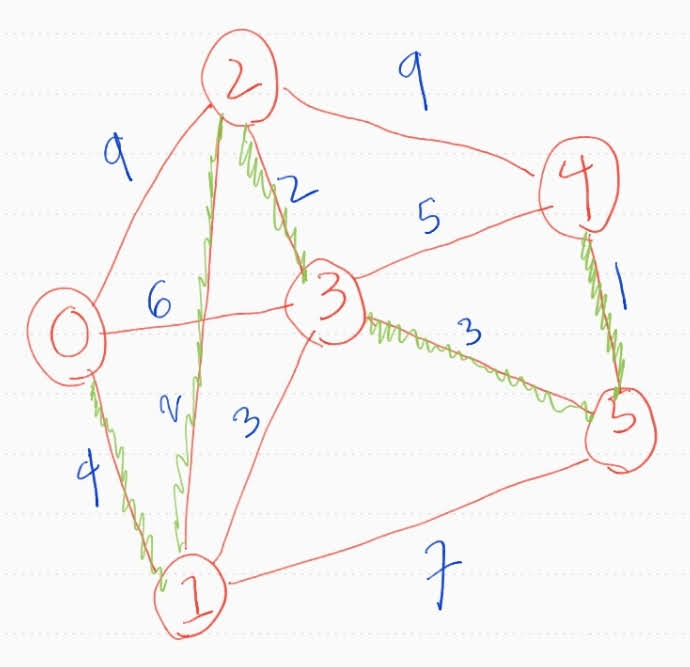

# Graph Version 1 Class

In this class, is_circular method is based on the idea of tree traversal.  Kruskal's Algorithm is used to find the path such that it covers all the vertices with the best possible shortest weight.

MST in the class involves four major process; building adjacency matrix, get minimum number, check circularities, and Kruskal algorithm.  Normally, time complexity for MST is O(n log n) with the pre-sorted list, but in this algorithm, it is difficult to implement pre-sorted list - thus, time complexity for MST is O(n<sup>3</sup>) because of get minimum number.  Time complexity for building adjacency matrix is O(n<sup>2</sup>).   

In [ ]:
INFINITY = math.inf

class GraphV1(object):
    """Handle graph related process."""
    def __init__(self, cities):
        self.adjMatrix = []
        
        size = len(cities)
        self._cities = cities
        for i in range(size):
            self.adjMatrix.append([INFINITY for i in range(size)])
        self.size = size
        
    def add_edge(self, v1, v2):
        if v1 == v2:
            distance = 0
        else:
            distance = self._cities[v1].how_far(self._cities[v2])
        self.adjMatrix[v1][v2] = distance
        
        # Comment the below line to create directioned edges
        # self.adjMatrix[v2][v1] = distance 
        
    def remove_edge(self, v1, v2):
        if self.adjMatrix[v1][v2] == 0:
            print("No edge between %d and %d" % (v1, v2))
            return
        self.adjMatrix[v1][v2] = INFINITY
        self.adjMatrix[v2][v1] = INFINITY
        
    def get_edge(self, v1, v2):
        return self.adjMatrix[v1][v2]
    
    def contains_edge(self, v1, v2):
        return True if self.adjMatrix[v1][v2] > 0 else False
    
    def __len__(self):
        return self.size
        
    def toString(self):
        for row in self.adjMatrix:
            for val in row:
                print('{:9.2f}  '.format(val), end=""),
            print()
            
    def get_minimum(self):
        min = INFINITY
        count_row = 0
        count_col = 0
        min_row = 0
        min_col = 0
        for row in self.adjMatrix:
            for val in row:
                if val < min and val != 0:
                    min = val
                    min_row = count_row
                    min_col = count_col
                count_col += 1
            count_row += 1
            count_col = 0  # reset after finish each row
        return min_row, min_col, min
    
    def mst_Kruskal(self):
        #     Kruskal'S Algorithm
        #     Algorithm Generic-MST(G, w):
        #         A <- 0
        #         while A does not form a spanning tree
        #             do find an edge (u, v) that is safe for A
        #                 A   <-A U {(u,v)}
        #         return A
        
        set_of_vertices = set()  # pairs of vertices or edges for spanning tree
        
        #for i in range(0, len(self.adjMatrix)-1):
        counter = len(self.adjMatrix)-1
        while(counter > 0):
            min_row, min_col, min = self.get_minimum()
            edge = (min_row, min_col)
            if not(self.is_cycle(min_row, min_col, set_of_vertices)): # do not have circularities   
                set_of_vertices.add(edge)
                counter -= 1
            self.remove_edge(min_row, min_col)  # remove visited minimum vertex
        return set_of_vertices
                
    def is_cycle(self, walk, search, vertices):
        """Test if the inputing vertex can cause cycle."""
        # This method can be used with undirected graph.
        # walk and search, can be put interchangablly.  The result will be the same.
        
        count = 0
        for vertex in vertices:
            copy_vertices = set((copy_vertex for copy_vertex in vertices if copy_vertex!=vertex ))
            if walk in vertex:
                if search in vertex:
                    return True
                
                # left visit
                walk = vertex[0]                
                if self.is_cycle(walk, search, copy_vertices) == True:
                    return True
                
                # right visit
                walk = vertex[1]
                if self.is_cycle(walk, search, copy_vertices) == True:
                    return True
                
        


# Graph Version 2 Class
Some modification is made based on GraphV1 class.  Also adjacency list Graph is partly utilized in this version.<br>
MST in the class involves four major process; building adjacency matrix, get minimum number, check circularities, and Kruskal algorithm.  Normally, time complexity for MST is O(n log n) with the pre-sorted list, but in this algorithm, it is difficult to implement pre-sorted list - thus, time complexity for MST is O(n<sup>3</sup>) because of get minimum number.  Time complexity for building adjacency matrix is O(n<sup>2</sup>).   

In [ ]:
INFINITY = math.inf

class GraphV2(object):
    """Handle graph related process."""    
    def __init__(self, cities):
        self.adjMatrix = []
        
        size = len(cities)
        self._cities = cities
        for i in range(size):
            self.adjMatrix.append([INFINITY for i in range(size)])
        self.size = size
        
    def add_edge(self, v1, v2):
        if v1 == v2:
            distance = 0
        else:
            distance = self._cities[v1].how_far(self._cities[v2])
        self.adjMatrix[v1][v2] = distance
        
        # Comment the below line to create directioned edges
        # self.adjMatrix[v2][v1] = distance 
        
    def remove_edge(self, v1, v2):
        if self.adjMatrix[v1][v2] == 0:
            print("No edge between %d and %d" % (v1, v2))
            return
        self.adjMatrix[v1][v2] = INFINITY
        self.adjMatrix[v2][v1] = INFINITY
        
    def get_edge(self, v1, v2):
        return self.adjMatrix[v1][v2]
    
    def contains_edge(self, v1, v2):
        return True if self.adjMatrix[v1][v2] > 0 else False
    
    def __len__(self):
        return self.size
        
    def toString(self):
        for row in self.adjMatrix:
            for val in row:
                print('{:9.2f}  '.format(val), end=""),
            print()
            
    def get_minimum(self):
        min = INFINITY
        count_row = 0
        count_col = 0
        min_row = 0
        min_col = 0
        for row in self.adjMatrix:
            for val in row:
                if val < min and val != 0:
                    min = val
                    min_row = count_row
                    min_col = count_col
                count_col += 1
            count_row += 1
            count_col = 0  # reset after finish each row
        return min_row, min_col, min
    
    def mst_Kruskal(self):
        #     Kruskal'S Algorithm
        #     Algorithm Generic-MST(G, w):
        #         A <- 0
        #         while A does not form a spanning tree
        #             do find an edge (u, v) that is safe for A
        #                 A   <-A U {(u,v)}
        #         return A
        
        set_of_vertices = set()  # pairs of vertices or edges for spanning tree
        graph_adj = GraphAdjacencyUndirected()
        
        
        #for i in range(0, len(self.adjMatrix)-1):
        counter = len(self.adjMatrix)-1
        while(counter > 0):
            min_row, min_col, min = self.get_minimum()
            edge = (min_row, min_col)
            graph_adj.addEdge(min_row, min_col)
            if not graph_adj.isCyclic(): # do not have circularities   
                set_of_vertices.add(edge)
                counter -= 1
            else:
                graph_adj.removeEdge(min_row, min_col) # remove from edge since it has circularities
            self.remove_edge(min_row, min_col)  # remove visited minimum vertex
        return set_of_vertices
    



In [ ]:
# Python Program to detect cycle in an undirected graph 

from collections import defaultdict 

#This class represents a undirected graph using adjacency list representation 
class GraphAdjacencyUndirected: 

    def __init__(self, vertices = 0): 
        self.V= vertices #No. of vertices 
        self.graph = defaultdict(list) # default dictionary to store graph 


    # function to add an edge to graph 
    def addEdge(self,v,w): 
        self.graph[v].append(w) #Add w to v_s list 
        self.graph[w].append(v) #Add v to w_s list 
        self.V = len(self.graph)
        
    # function to pop an edge to graph
    def popEdge(self,v,w):
        pop_key = None
        count = 0
        for value in self.graph[v]:
            if value == w:
                pop_key = count
                break
            count += 1
        if pop_key != None:
            self.graph[v].pop(pop_key)    
    
    # function to remove an edge to graph by using popEdge
    def removeEdge(self,v,w):
        self.popEdge(v,w)
        self.popEdge(w,v)
        
        if len(self.graph[w]) == 0:  # Remove if nothing left
            self.graph.pop(w)
            
        if len(self.graph[v]) == 0:  # Remove if nothing left
            self.graph.pop(v)
        self.V = len(self.graph)


    #Returns true if the graph contains a cycle, else false. 
    def isCyclic(self): 
        # Mark all the vertices as not visited 
        return cycle_exists(self.graph)

In [ ]:
def cycle_exists(G):                      # - G is an undirected graph.              
    marked = { u : False for u in G }     # - All nodes are initially unmarked.
    found_cycle = [False]                 # - Define found_cycle as a list so we can change
                                          # its value per reference, see:
                                          # http://stackoverflow.com/questions/11222440/python-variable-reference-assignment
 
    for u in G:                           # - Visit all nodes.
        if not marked[u]:
            dfs_visit(G, u, found_cycle, u, marked)     # - u is its own predecessor initially
        if found_cycle[0]:
            break
    return found_cycle[0]
 
#--------
 
def dfs_visit(G, u, found_cycle, pred_node, marked):
    if found_cycle[0]:                                # - Stop dfs if cycle is found.
        return
    marked[u] = True                                  # - Mark node.
    for v in G[u]:                                    # - Check neighbors, where G[u] is the adjacency list of u.
        if marked[v] and v != pred_node:              # - If neighbor is marked and not predecessor,
            found_cycle[0] = True                     # then a cycle exists.
            return
        if not marked[v]:                             # - Call dfs_visit recursively.
            dfs_visit(G, v, found_cycle, u, marked)

## Graph Adjacency List Directed
I created this for the future use.

In [ ]:
# Python Program to detect cycle in an undirected graph 

from collections import defaultdict 

#This class represents a undirected graph using adjacency list representation 
class GraphAdjacencyDirected: 

    def __init__(self, vertices = 0): 
        self.V= vertices #No. of vertices 
        self.graph = defaultdict(list) # default dictionary to store graph 


    # function to add an edge to graph 
    def addEdge(self,v,w): 
        self.graph[v].append(w) #Add w to v_s list 
        self.V = len(self.graph)
        
    # function to pop an edge to graph
    def popEdge(self,v,w):
        pop_key = None
        count = 0
        for value in self.graph[v]:
            if value == w:
                pop_key = count
                break
            count += 1
        if pop_key != None:
            self.graph[v].pop(pop_key)
            
    
    
    # function to remove an edge to graph by using popEdge
    def removeEdge(self,v,w):
        self.popEdge(v,w) 
    
        if len(self.graph[v]) == 0:  # Remove if nothing left
            self.graph.pop(v)
        self.V = len(self.graph)




## Priority Queue Base

In [ ]:
# Copyright 2013, Michael H. Goldwasser
#
# Developed for use with the book:
#
#    Data Structures and Algorithms in Python
#    Michael T. Goodrich, Roberto Tamassia, and Michael H. Goldwasser
#    John Wiley & Sons, 2013
#
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
#
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.
#
# You should have received a copy of the GNU General Public License
# along with this program.  If not, see <http://www.gnu.org/licenses/>.


class PriorityQueueBase:
    """Abstract base class for a priority queue."""

    #--------------------- nested _Item class ------------------------------
    class _Item:
        """Lightweight composite to store priority queue items."""
        __slots__ = 'key', 'value'

        def __init__(self, k, v):
            self.key = k
            self.value = v

        def __lt__(self, other):
            return self.key < other.key  # compare items based on their keys

        def __repr__(self):
            return '({0},{1})'.format(self.key, self.value)

    #------------------- public behaviors ------------------------------
    def is_empty(self):              # concrete method assuming abstract len
        """Return True if the priority queue is empty."""
        return len(self) == 0

    def __len__(self):
        """Return the number of items in the priority queue."""
        raise NotImplementedError('must be implemented by subclass')

    def add(self, key, value):
        """Add a key-value pair."""
        raise NotImplementedError('must be implemented by subclass')

    def min(self):
        """Return but do not remove (k,v) tuple with minimum key.

        Raise Empty exception if empty.
        """
        raise NotImplementedError('must be implemented by subclass')

    def remove_min(self):
        """Remove and return (k,v) tuple with minimum key.

        Raise Empty exception if empty.
        """
        raise NotImplementedError('must be implemented by subclass')

# Heap Priority Queue
The original code was written for min heap, and the modified version was added one more class for max heap.  In the first part of the assignment, I used insertion sort whose Big O is O(n<sup>2</sup>).  In the final part, I used heap priority queue to have better time complexity.  In term of heap prioriy queue, time complexity to add or insert or remove items in the list is O(log n).

In [ ]:
# Copyright 2013, Michael H. Goldwasser
#
# Developed for use with the book:
#
#    Data Structures and Algorithms in Python
#    Michael T. Goodrich, Roberto Tamassia, and Michael H. Goldwasser
#    John Wiley & Sons, 2013
#
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
#
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.
#
# You should have received a copy of the GNU General Public License
# along with this program.  If not, see <http://www.gnu.org/licenses/>.

# The original code is modified for educational purposes.

class EmptyError(Exception):
    pass

class MinHeapPriorityQueue(PriorityQueueBase): # base class defines _Item
    """A min-oriented priority queue implemented with a binary heap."""

    #-------------- nonpublic behaviors ------------------------------
    def _parent(self, j):
        return (j-1) // 2

    def _left(self, j):
        return 2*j + 1

    def _right(self, j):
        return 2*j + 2

    def _has_left(self, j):
        return self._left(j) < len(self._data)   # index beyond end of list?

    def _has_right(self, j):
        return self._right(j) < len(self._data)  # index beyond end of list?

    def _swap(self, i, j):
        """Swap the elements at indices i and j of array."""
        self._data[i], self._data[j] = self._data[j], self._data[i]

    def _upheap(self, j):
        parent = self._parent(j)
        if j > 0 and self._data[j] < self._data[parent]:
            self._swap(j, parent)
            self._upheap(parent)             # recur at position of parent

    def _downheap(self, j):
        if self._has_left(j):
            left = self._left(j)
            small_child = left              # although right may be smaller
            if self._has_right(j):
                right = self._right(j)
                if self._data[right] < self._data[left]:
                    small_child = right
            if self._data[small_child] < self._data[j]:
                self._swap(j, small_child)
                self._downheap(small_child) # recur at position of small child

    #-------------------- public behaviors ------------------------------
    def __init__(self):
        """Create a new empty Priority Queue."""
        self._data = []

    def __len__(self):
        """Return the number of items in the priority queue."""
        return len(self._data)

    def add(self, key, value):
        """Add a key-value pair to the priority queue."""
        self._data.append(self._Item(key, value))
        self._upheap(len(self._data) - 1)    # upheap newly added position

    def min(self):
        """Return but do not remove (k,v) tuple with minimum key.

        Raise Empty exception if empty.
        """
        if self.is_empty():
            raise EmptyError('Priority queue is empty.')
        item = self._data[0]
        return (item.key, item.value)

    def remove_min(self):
        """Remove and return (k,v) tuple with minimum key.

        Raise Empty exception if empty.
        """
        if self.is_empty():
            raise EmptyError('Priority queue is empty.')
        self._swap(0, len(self._data) - 1)      # put minimum item at the end
        item = self._data.pop()                 # and remove it from the list;
        self._downheap(0)                       # then fix new root
        return (item.key, item.value)
    
    def pop(self):
        """Alias of remove_min."""
        return self.remove_min()
    

# if __name__ == "__main__":
#     h = MinHeapPriorityQueue()
#     keys = [11, 6, 2, 1, 5, 9]
#     for key in keys:
#         h.add(key, "val_" + str(key))

#     print(h._data)

        
#     while not h.is_empty():
#         k, v = h.remove_min()
#         print(k, v)

In [ ]:
# Copyright 2013, Michael H. Goldwasser
#
# Developed for use with the book:
#
#    Data Structures and Algorithms in Python
#    Michael T. Goodrich, Roberto Tamassia, and Michael H. Goldwasser
#    John Wiley & Sons, 2013
#
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
#
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.
#
# You should have received a copy of the GNU General Public License
# along with this program.  If not, see <http://www.gnu.org/licenses/>.

# The original code is modified for educational purposes.

class EmptyError(Exception):
    pass

class MaxHeapPriorityQueue(PriorityQueueBase): # base class defines _Item
    """A min-oriented priority queue implemented with a binary heap."""

    #-------------- nonpublic behaviors ------------------------------
    def _parent(self, j):
        return (j-1) // 2

    def _left(self, j):
        return 2*j + 1

    def _right(self, j):
        return 2*j + 2

    def _has_left(self, j):
        return self._left(j) < len(self._data)   # index beyond end of list?

    def _has_right(self, j):
        return self._right(j) < len(self._data)  # index beyond end of list?

    def _swap(self, i, j):
        """Swap the elements at indices i and j of array."""
        self._data[i], self._data[j] = self._data[j], self._data[i]

    def _upheap(self, j):
        parent = self._parent(j)
        if j > 0 and self._data[j] > self._data[parent]:
            self._swap(j, parent)
            self._upheap(parent)             # recur at position of parent

    def _downheap(self, j):
        if self._has_left(j):
            left = self._left(j)
            small_child = left              # although right may be smaller
            if self._has_right(j):
                right = self._right(j)
                if self._data[right] > self._data[left]:
                    small_child = right
            if self._data[small_child] > self._data[j]:
                self._swap(j, small_child)
                self._downheap(small_child) # recur at position of small child

    #-------------------- public behaviors ------------------------------
    def __init__(self):
        """Create a new empty Priority Queue."""
        self._data = []

    def __len__(self):
        """Return the number of items in the priority queue."""
        return len(self._data)

    def add(self, key, value):
        """Add a key-value pair to the priority queue."""
        self._data.append(self._Item(key, value))
        self._upheap(len(self._data) - 1)    # upheap newly added position

    def max(self):
        """Return but do not remove (k,v) tuple with minimum key.

        Raise Empty exception if empty.
        """
        if self.is_empty():
            raise EmptyError('Priority queue is empty.')
        item = self._data[0]
        return (item.key, item.value)

    def remove_max(self):
        """Remove and return (k,v) tuple with minimum key.

        Raise Empty exception if empty.
        """
        if self.is_empty():
            raise EmptyError('Priority queue is empty.')
        self._swap(0, len(self._data) - 1)      # put minimum item at the end
        item = self._data.pop()                 # and remove it from the list;
        self._downheap(0)                       # then fix new root
        return (item.key, item.value)
    
    def pop(self):
        """Alias of remove_max."""
        return self.remove_max()

# if __name__ == "__main__":
#     h = MaxHeapPriorityQueue()
#     keys = [11, 6, 2, 18, 99, 25, 1, 5, 9]
#     for key in keys:
#         h.add(key, "val_" + str(key))

#     print(h._data)

        
#     while not h.is_empty():
#         k, v = h.remove_max()
#         print(k, v)

## City class

In [ ]:
class City:
    """Represent a City object"""
    def __init__(self, city_id, x_coordinate, y_coordinate, prime):
        """Initialise a City instance."""
        self._city_id = city_id
        self._x = x_coordinate
        self._y = y_coordinate
        self._prime = prime
        
    def __lt__(self, other): 
        # For < operator comparison
        return self.get_weight() < other.get_weight() 
        
    def __le__(self, other): 
        # For <= operator comparison
        return self.get_weight() <= other.get_weight() 
        
    def __ne__(self, other): 
        # For != or <> operator comparison
        return self.get_weight() != other.get_weight() 
    
    def __gt__(self, other): 
        # For > operator comparison
        return self.get_weight() > other.get_weight()     
        
    def __ge__(self, other): 
        # For >= operator comparison
        return self.get_weight() >= other.get_weight() 
        
    def is_prime(self): 
        # Check if the city_id is prime
        return self._prime
        
    def get_x(self):
        return self._x
    
    def get_y(self):
        return self._y
    
    def get_city_id(self):
        return self._city_id
    
    def get_distance(self):
        return self._distance
    
    def get_angle(self):
        # Get the angle from the originated city
        return self._angle
    
    def get_weight(self):
        # Get euclidean distance base on calculation of x,y,angle
        # from the originated city
        return self._weight
    
    def set_distance(self, distance):
        self._distance = distance
        
    def set_angle(self, angle):
        # Set the angle from the originated city
        self._angle = angle
        
    def set_weight(self, weight):
        # Set euclidean distance base on calculation of x,y,angle
        # from the originated city
        self._weight = weight
        
    def how_far(self, other):
        """Find euclidean distance between two cities"""
        distance_x = (float(self.get_x()) - float(other.get_x())) ** 2
        distance_y = (float(self.get_y()) - float(other.get_y())) ** 2
        distance = math.sqrt(distance_x + distance_y)
        return distance

## Total distance
The growth rate for this function: g(n) = n. 
Hence, O(n)

In [ ]:
def total_distance(list_of_route, start=0, end=None):
    """Calculate distance to next route city and set the value"""
    
    # check the validity of start variable
    if start >= len(list_of_route):
        start = len(list_of_route) # control out of bound value
        
    # check the validity of end variable
    if end == None:
        end = len(list_of_route) # set the default value
    elif end > len(list_of_route):
        end = len(list_of_route) # control out of bound value
        
    # calculate total distance along the route from start to end
    total_distance = 0
    for i in range(start, end): 
        current_city = list_of_route[i]  
        total_distance += current_city.get_distance() # accumulate distance
    return total_distance

In [ ]:
def find_angle(city1, city2):
    """Find angle between two cities"""
    x1 = city1.get_x()
    y1 = city1.get_y()
    x2 = city2.get_x()
    y2 = city2.get_y()
    x = x2-x1
    y = y2-y1
    angle = math.atan2(y, x)
    angle = math.degrees(angle)
    return angle

## Recursive function

In [ ]:
def check_prime(n,i=2):
    """Check if given number is prime"""
    if(n<=2):
        if n == 2:
            return True
        else:
            return False
    if(n%i==0):
        return False
    if(i*i > n):
        return True
    return check_prime(n,i+1)

## Euclidean fuction
The following functions have the growth rate function g(n) = 1. <br>
Hence, O(1)


In [ ]:
def euclidean_distance(city1, city2):
    """Find euclidean distance between two cities"""
    distance_x = (float(city1.get_x()) - float(city2.get_x())) ** 2
    distance_y = (float(city1.get_y()) - float(city2.get_y())) ** 2
    distance = math.sqrt(distance_x + distance_y)
    return distance

def euclidean_weight(city1, city2):
    """Find three demension euclidean distance between two cities"""
    distance_x = (float(city1.get_x()) - float(city2.get_x())) ** 2
    distance_y = (float(city1.get_y()) - float(city2.get_y())) ** 2
    distance_angle = (float(city1.get_angle()) - float(city2.get_angle())) ** 2
    distance = math.sqrt(distance_x + distance_y + distance_angle)
    if city2.get_x() < city1.get_x():
        distance = (-1) * distance
    return distance

## Read cities.csv
The big O of the following function is O(n).

In [ ]:
def load_cities(records_to_load):
    """Open the file and transform data into city objects"""
    in_file = open('../input/traveling-santa-2018-prime-paths/cities.csv', 'r')

    # use readlines() instead of readline() for better time complexity
    lines = in_file.readlines()
    line_count = 0
    cities = []
    lines_to_read = records_to_load 

    lines_to_read = lines_to_read + 1 # Increase 1 to exclude a header line

    prime_list = [i for i in range(1, lines_to_read) if check_prime(i)]
    if lines_to_read >= len(lines):
        lines_to_read = len(lines)

    for i in range(0, lines_to_read):
        line = lines[i]
        line = line.strip()
        (city_id, x, y) = line.split(',')

        # Neglect first line(header) and other unnecessary lines
        if city_id.isdigit():
            if int(city_id) in prime_list:
                prime_status = True
            else:
                prime_status = False
            city = City(int(city_id), float(x), float(y), prime_status)
            cities.append(city)

    
    print("Involved cities in the process:", len(cities))
    return cities

# Divide and Conquer
Divide and conquer method is used to reduce the burden of both time and space complexity. First, all cities are divided into four portions and then sorted using their weights which are calculated based on their X,Y, and angle from the originated city. 
In the first part of this Assignment, insertion sort was used.


There are many ways to sort, but heap priority queue is used in this assignment.  Both minimum and maximum heap priority queue are utilized in this assignment.

Analysis: divide_cities' g(n) = n log n. Hence, O(n log n) 

In [ ]:
def divide_cities(cities):
    """Divide the cities into four parts based on X and Y coordinates of the originated city"""
    originated_city = cities[0]
    lower_right_altitude = MinHeapPriorityQueue()
    lower_left_altitude = MaxHeapPriorityQueue()
    upper_right_altitude = MaxHeapPriorityQueue()
    upper_left_altitude = MinHeapPriorityQueue()
    border_y = originated_city.get_y() # Use this to divide the list into two parts based on y
    border_x = originated_city.get_x() # Use this to divide the list into two parts based on x

    for current_city in cities:
        distance_to_originated_city = euclidean_distance(originated_city, current_city)
        angle = find_angle(originated_city, current_city)
        current_city.set_angle(angle)
        current_city.set_distance(distance_to_originated_city)

        # calculate euclidean distance by taking into account of x,y,angle to originated city
        weight_to_originated_city = euclidean_weight(originated_city, current_city)
        current_city.set_weight(weight_to_originated_city)

        # devide the map into two parts based on y of the originated city
        if current_city.get_y() <= border_y:
            key = weight_to_originated_city
            if current_city.get_x() <= border_x:
                lower_left_altitude.add(key, current_city)
            else:
                lower_right_altitude.add(key, current_city)
        else:
            key = weight_to_originated_city
            if current_city.get_x() < border_x:
                upper_left_altitude.add(key, current_city)
            else:
                upper_right_altitude.add(key, current_city)


    upper_left_altitude.add(0.0, originated_city) # add the originated city for final destination
    return lower_right_altitude, lower_left_altitude, upper_right_altitude, upper_left_altitude

## Vistualize the Routes

In [ ]:
def draw_route(routes, numbering = True):
    """Display the result as a graph"""
    # numbering control whether to display cities with their route sequential or not

    route_of_cities = routes
    # Defining coordinates to be plotted on X and Y axes respectively
    x = [route_of_cities[i].get_x() for i in range(0, len(route_of_cities))]
    y = [route_of_cities[i].get_y() for i in range(0, len(route_of_cities))]
    x_prime = [route_of_cities[i].get_x() for i in range(0, len(route_of_cities)) if route_of_cities[i].is_prime()]
    y_prime = [route_of_cities[i].get_y() for i in range(0, len(route_of_cities)) if route_of_cities[i].is_prime()]

    plt.figure(figsize=(12,9))

    # Plot lists 'x' and 'y'
    plt.plot(x, y, 'go-')
    plt.plot(x_prime, y_prime, 'oc')
    plt.plot(x[0], y[0], 'or') # red dot for the originated city
    plt.xlabel('X') #label for X axis
    plt.ylabel('Y') #label for Y axis 
    plt.title('Possible route for {:d} cities (red = originated city, magenta = prime City_ID)'.format(len(route_of_cities)-1))

    #plt.scatter(x,y,color='blue')
    if numbering:
        i = 0
        for route_city in route_of_cities:
            x = route_city.get_x()
            y = route_city.get_y()
            if i < (len(route_of_cities)-1):
                plt.text(x, y + 10, i, fontsize=12)
            #print("i=", i, "Next distance=",route_city.get_distance(), "city_id =", route_city.get_city_id(), route_city.get_x(),",",
            #      route_city.get_y(), ",", route_city.get_angle(), ",", route_city.get_weight())
            i += 1

    plt.show()
    print("The red dot is the originated city, and magenta color dots are cities that have prime City ID.")

In [ ]:
def draw_edges(vertices, cities):
    """Display the result as a graph based on given vertices"""
    plt.figure(figsize=(12,9))
    for vertex in vertices:
        x = []
        y = []
        
        # Defining coordinates to be plotted on X and Y axes respectively
        i =vertex[0]
        x.append(cities[i].get_x())
        y.append(cities[i].get_y())
        plt.text(cities[i].get_x(), cities[i].get_y() + 10, i, fontsize=12)
        
        j = vertex[1]
        x.append(cities[j].get_x())
        y.append(cities[j].get_y())
        plt.text(cities[j].get_x(), cities[j].get_y() + 10, j, fontsize=12)
       
        plt.plot(x, y, 'go-')

    # Plot lists 'x' and 'y'

    plt.xlabel('X') #label for X axis
    plt.ylabel('Y') #label for Y axis 

    plt.show()


# Test with small number of cities

In [ ]:
raw_cities = load_cities(20)
lower_right_altitude, lower_left_altitude, upper_right_altitude, upper_left_altitude = divide_cities(raw_cities)
cities_route = []

h = lower_right_altitude

while not h.is_empty():
#for i in range(5):
    k, v = h.remove_min()
    cities_route.append(v)
    
cities = cities_route
graph_cities = GraphV1(cities)
for i in range(0, len(cities)):
    self_distance = 0
    for j in range(i, len(cities)):
        graph_cities.add_edge(i, j)

graph_cities.toString()
vertices = graph_cities.mst_Kruskal()

print(vertices)
draw_edges(vertices, cities)



## Second Test with over 100 cities
I found that it took long when over 100 cities involves in the calculation.  I found that the circularities calculation method (is_cycle) is the main cause for this.  Also I put some limitation on adjacency matrix to reduce processing time.  I will find a way to improve circularities calculation method.  I will name the improve Graph class to be GraphV2.

In [ ]:
raw_cities = load_cities(105)
lower_right_altitude, lower_left_altitude, upper_right_altitude, upper_left_altitude = divide_cities(raw_cities)
cities_route = []

h = lower_right_altitude
while not h.is_empty():
    k, v = h.pop()
    cities_route.append(v)
    
cities = cities_route
graph_cities = GraphV1(cities)  # use Graph V1
for i in range(0, len(cities)):
    self_distance = 0

    limit = 5  # limit to set number of calculation for adj matrix from the current position
    if (i+limit) < len(cities):
        matrix_limit = i + limit
    else:
        matrix_limit = len(cities)

    for j in range(i, matrix_limit):
        graph_cities.add_edge(i, j)

vertices = graph_cities.mst_Kruskal()  # running spanning tree algorithm

draw_edges(vertices, cities)


## Third Test with Modified Graph Class (GraphV2)
The result is the same, but it has better in terms of time complexity.  The modified version of Graph useds depth first search (DFS) algorithm to find circularities, and it can handle well.

In [ ]:
raw_cities = load_cities(105)
lower_right_altitude, lower_left_altitude, upper_right_altitude, upper_left_altitude = divide_cities(raw_cities)
cities_route = []

h = lower_right_altitude
while not h.is_empty():
    k, v = h.pop()
    cities_route.append(v)
    
cities = cities_route
graph_cities = GraphV2(cities)  # use Graph V2
for i in range(0, len(cities)):
    self_distance = 0

    limit = 5  # limit to set number of calculation for adj matrix from the current position
    if (i+limit) < len(cities):
        matrix_limit = i + limit
    else:
        matrix_limit = len(cities)

    for j in range(i, matrix_limit):
        graph_cities.add_edge(i, j)

vertices = graph_cities.mst_Kruskal()  # running spanning tree algorithm

draw_edges(vertices, cities)


# Merging
In order to track graph with city, I will combine lower two parts to one lower part and two upper parts to one upper part.  Finally, lower and upper parts will be combined.  So the tracking will be easier to undertake.

In [ ]:
def merge_two(first_part, second_part):
    """Merge two parts."""
    cities_route = []

    first = first_part
    second = second_part

    while not first.is_empty():
        k, v = first.pop()
        cities_route.append(v)
        
    while not second.is_empty():
        k, v = second.pop()
        cities_route.append(v)
    return cities_route

## More Test on Merging
More test is conducted for the whole map (combination of both lower and upper parts)

In [ ]:
raw_cities = load_cities(100)
lower_right_altitude, lower_left_altitude, upper_right_altitude, upper_left_altitude = divide_cities(raw_cities)
cities_route_lower = merge_two(lower_left_altitude, lower_right_altitude)
cities_route_upper = merge_two(upper_right_altitude, upper_left_altitude)
cities_route = cities_route_lower + cities_route_upper

draw_route(cities_route)

It is working as expected.  Now I will test with MST.

In [ ]:
cities = cities_route
graph_cities = GraphV2(cities)  # use Graph V2
for i in range(0, len(cities)):
    self_distance = 0

    limit = 5  # limit to set number of calculation for adj matrix from the current position
    if (i+limit) < len(cities):
        matrix_limit = i + limit
    else:
        matrix_limit = len(cities)

    for j in range(i, matrix_limit):
        graph_cities.add_edge(i, j)

vertices = graph_cities.mst_Kruskal()  # running spanning tree algorithm

draw_edges(vertices, cities)

## Test with 500 Cities

In [ ]:
raw_cities = load_cities(500)
lower_right_altitude, lower_left_altitude, upper_right_altitude, upper_left_altitude = divide_cities(raw_cities)
cities_route_lower = merge_two(lower_left_altitude, lower_right_altitude)
cities_route_upper = merge_two(upper_right_altitude, upper_left_altitude)
cities_route = cities_route_lower + cities_route_upper

draw_route(cities_route)

cities = cities_route
graph_cities = GraphV2(cities)  # use Graph V2
for i in range(0, len(cities)):
    self_distance = 0

    limit = 5  # limit to set number of calculation for adj matrix from the current position
    if (i+limit) < len(cities):
        matrix_limit = i + limit
    else:
        matrix_limit = len(cities)

    for j in range(i, matrix_limit):
        graph_cities.add_edge(i, j)

vertices = graph_cities.mst_Kruskal()  # running spanning tree algorithm

draw_edges(vertices, cities)

# Test on The Whole Set
Loading the whole set and sorting with heap piority queue are fine, but when the whole set was tested, it showed the following message.  The adjancency matrix cannot handle very well on building 197769 (rows) x 197769 (cols) at once.  
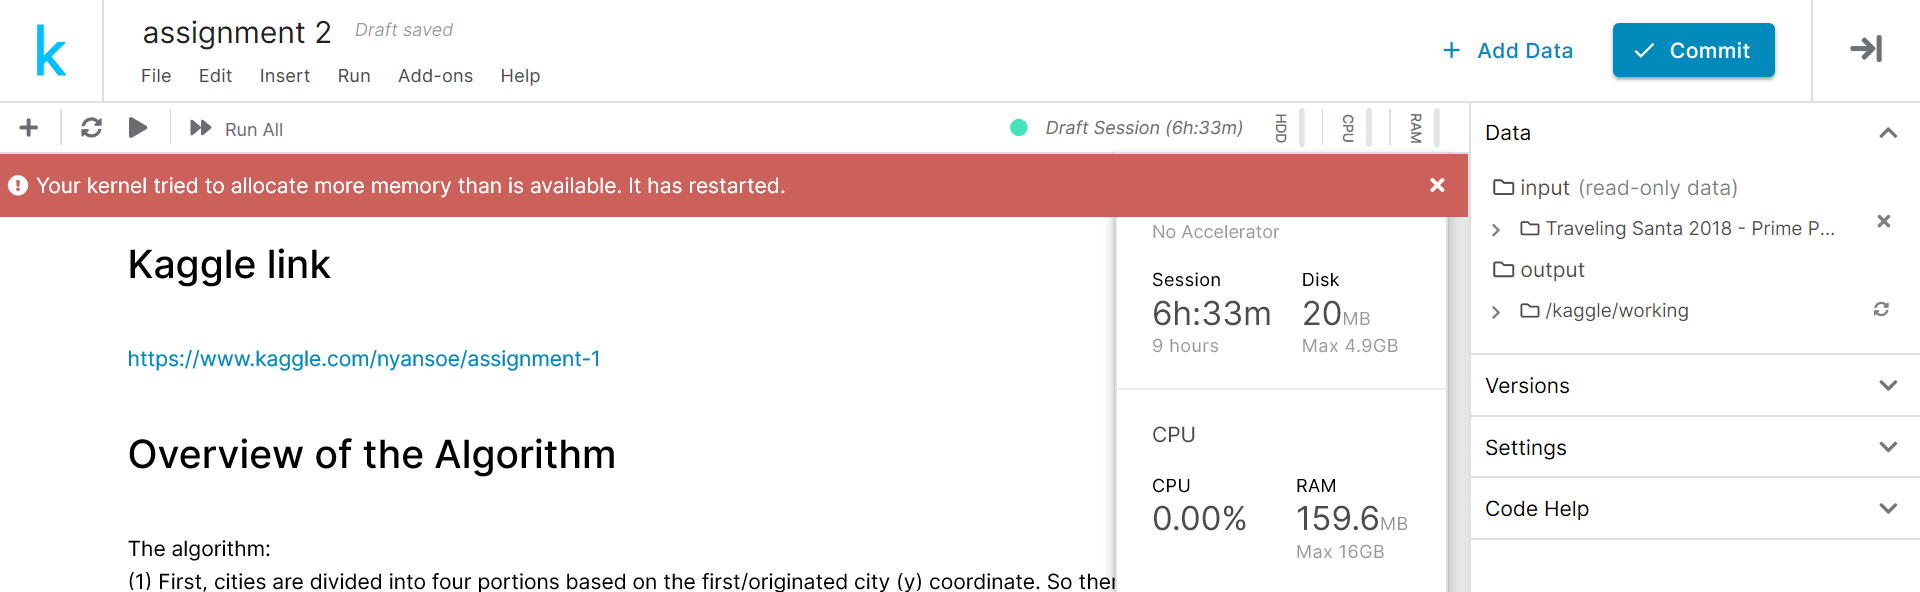
So it could not handle the whole set at once.  The issue lies with adjacency matrix.  It cannot handle large a matrix set.

The following screenshot proves that the building adjacency matrix can not build a matrix for the whole set.
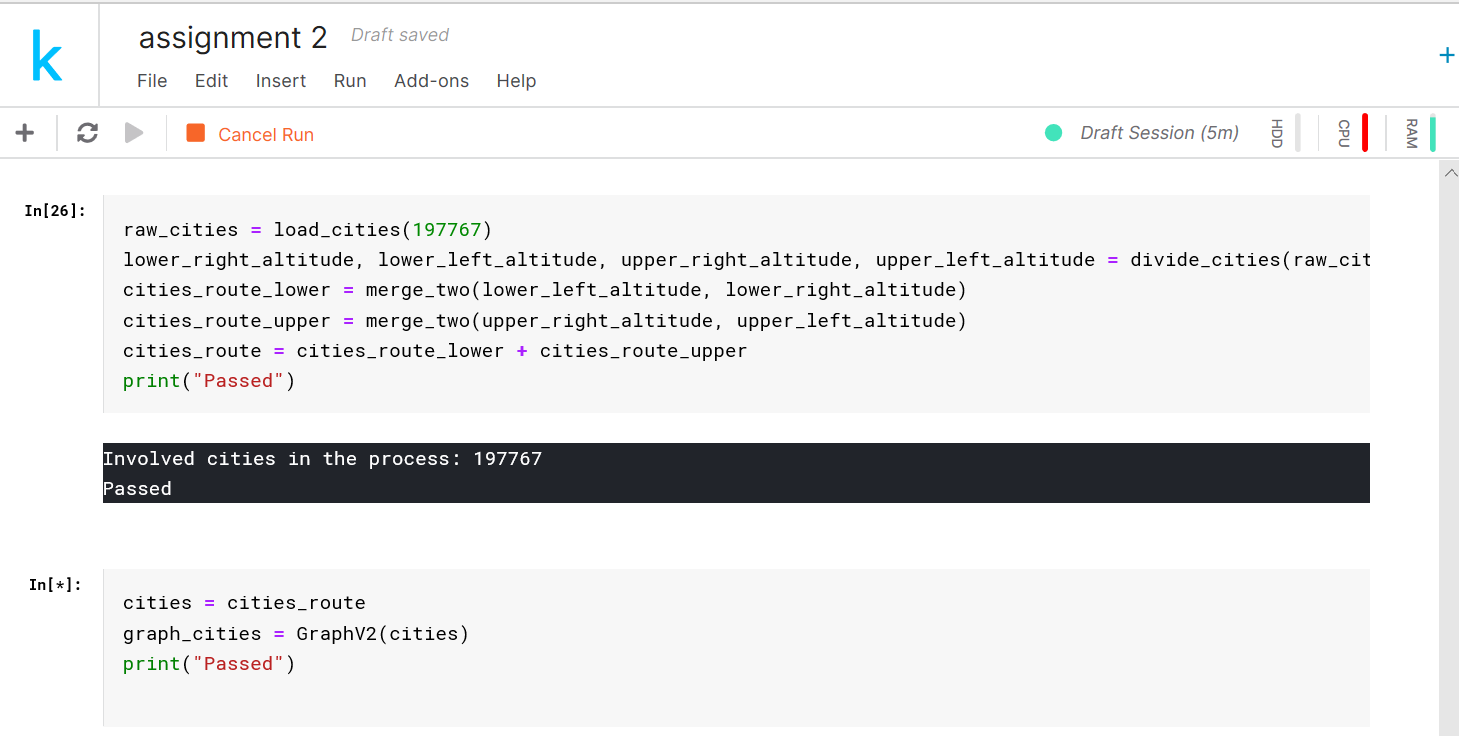

In [ ]:
# raw_cities = load_cities(197767)
# lower_right_altitude, lower_left_altitude, upper_right_altitude, upper_left_altitude = divide_cities(raw_cities)
# cities_route_lower = merge_two(lower_left_altitude, lower_right_altitude)
# cities_route_upper = merge_two(upper_right_altitude, upper_left_altitude)
# cities_route = cities_route_lower + cities_route_upper
# print("Passed")

In [ ]:
# cities = cities_route
# graph_cities = GraphV2(cities)
# print("Passed")


## Try to Divide the Dataset to Use With MST
The below code was implemented to divide the dataset in order to use with adjacency matrix and MST.  However, I found that it would become extremely complex with respect to tracking city ID and merging MSTs.  So I stopped developing further and commented out.

In [ ]:
# raw_cities = load_cities(13)
# lower_right_altitude, lower_left_altitude, upper_right_altitude, upper_left_altitude = divide_cities(raw_cities)
# cities_route_lower = merge_two(lower_left_altitude, lower_right_altitude)
# cities_route_upper = merge_two(upper_right_altitude, upper_left_altitude)
# cities_route = cities_route_lower + cities_route_upper 

# # however cities_route is already added one more city at the end by lower_left_altitude

# copy_limit = 5
# counter = len(cities_route)
# loop = counter//copy_limit
# remainder = counter % copy_limit

# start = 0
# end = copy_limit
# cities = []

# for k in range(loop):
#     if i < (loop - 1):
#         cities = cities_route[start:end]
#     else:
#         cities = cities_route[start:(end+remainder)]
#     start = end
#     end = end + copy_limit
#     # print(start, end)
    
#     graph_cities = GraphV2(cities)
#     for i in range(0, len(cities)):
#         self_distance = 0

#         limit = 5  # limit to set number of calculation for adj matrix from the current position
#         if (i+limit) < len(cities):
#             matrix_limit = i + limit
#         else:
#             matrix_limit = len(cities)

#         for j in range(i, matrix_limit):
#             graph_cities.add_edge(i, j)
# #         vertices = graph_cities.mst_Kruskal()
# #         print(vertices)

# print(len(test_copy)) 

# if (test_copy == cities_route):
#     print("yes")
    


    

# Conclusion and Discussion
The Big O for this algorithm is O(n<sup>3</sup>). There are three vital parts in this algorithm; building adjacency matrix (O(n<sup>2</sup>)), heap priority queue (O(log n)) and Kruskal's minimum spanning tree O(n<sup>3</sup>) - instead of (O(n log n)) because of finding the smallest weight value in the adjacency matrix.  In terms of data structures, graph (adjacency matrix and adjacency list) and heap priority queue are used.  <br><br>
In this assignment, heap priority queue can handle a large data set.  Also it can give better time complexity than the insertion sort which was used in the first part of the assignment.  In addition, I used the adjacency matrix to store weight value and edge status.  However, it cannot handle well for the large data set because its space complexity and time complexity are O(n<sup>2</sup>).<br><br>
In terms of space complexity, the adjacency matrix dominates others with O(n<sup>2</sup>).  With regards to time complexity, Kruskal's minimum spanning tree in this algorithm surpasses others with O(n<sup>3</sup>) because it needs to call the method that finds the smallest weight in the matrix.<br><br>
This algorithm needs more work to become better.  As far as I am concerned, it need two significant works to carry out.  First, it should be able to build the MST for the whole data set which has around 200,000 records.  Second, it should be able to transform MST to a serialized city list.  In the future work, I might try to untilize the adjacency list for Graph instead of adjacency matrix.


